In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [35]:
X = pd.read_csv("/content/drive/My Drive/10Acad/bank-additional/bank-additional/features.csv")
y = pd.read_csv("/content/drive/My Drive/10Acad/bank-additional/bank-additional/results.csv")

In [36]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 4)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 4)

In [37]:
def model_classifier(model, X, y, cv):
    """
    Creates folds manually, perform 
    Returns an array of validation (recall) scores
    """
    if cv == 'kf':
        cv = KFold(n_splits = 10, shuffle = True, random_state = 4)
    elif cv == 'skf':
        cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 4)
    else:
        cv == None
    
    scores = []
    
    
    for train_index,test_index in cv.split(X,y):
        X_train,X_test = X.loc[train_index],X.loc[test_index]
        y_train,y_test = y.loc[train_index],y.loc[test_index]

        # Fit the model on the training data
        model_obj = model.fit(X_train, y_train)
        y_pred = model_obj.predict(X_test)
        # Score the model on the validation data
        score = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        scores.append(score)
        mean_score = np.array(scores).mean()
        
    print('Accuracy scores of the model: {:.2f}'.format(mean_score))
    print('\n Classification report of the model')
    print('--------------------------------------')
    print(report)
    
    print('\n Confusion Matrix of the model')
    print('--------------------------------------')
    print(conf_matrix)
    


In [38]:
def roc_plot(model, X, y, cv):
  '''ROC plot function '''

  for train_index,test_index in cv.split(X,y):
    X_train,X_test = X.loc[train_index],X.loc[test_index]
    y_train,y_test = y.loc[train_index],y.loc[test_index]
    model_obj = model.fit(X_train, y_train)
    y_pred = model_obj.predict(X_test)
    y_pred_prob = model_obj.predict_proba(X_test)[:,1]
        
  logit_roc_auc = roc_auc_score(y_test, y_pred)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
  plt.figure()
  val_model = input("Enter your model name: ")
  plt.plot(fpr, tpr, label= val_model + ' (area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()

#### HYPER-PARAMETER TUNING USING RANDOMIZEDSEARCHCV

##### LOGISTIC REGRESSION

In [ ]:
logreg = LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "solver":['liblinear', 'saga']}
logreg_cv = RandomizedSearchCV(logreg, grid)

###### USING KFOLD

In [ ]:
model_classifier(logreg_cv, X, y, kf)

Accuracy scores of the model: 0.68

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      3442
           1       0.71      0.63      0.67      3537

    accuracy                           0.68      6979
   macro avg       0.69      0.69      0.68      6979
weighted avg       0.69      0.68      0.68      6979


 Confusion Matrix of the model
--------------------------------------
[[2553  889]
 [1311 2226]]


###### USING STRATIFIED KFOLD

In [ ]:
model_classifier(logreg_cv, X, y, skf)

Accuracy scores of the model: 0.68

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      3489
           1       0.69      0.64      0.66      3490

    accuracy                           0.68      6979
   macro avg       0.68      0.68      0.68      6979
weighted avg       0.68      0.68      0.68      6979


 Confusion Matrix of the model
--------------------------------------
[[2515  974]
 [1272 2218]]


###### ROC PLOT

Enter your model name: logisticRegressionSKFold


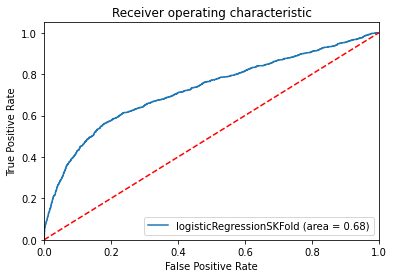

In [ ]:
roc_plot(logreg_cv, X, y, skf)

Enter your model name: logisticRegressionKFold


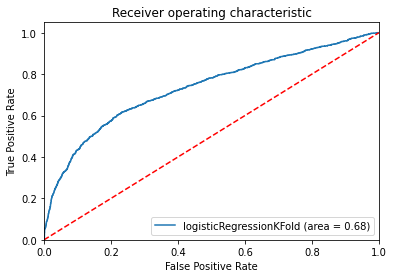

In [ ]:
roc_plot(logreg_cv, X, y, kf)

##### XGBOOST 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 4)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb_hyp = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

xgb_random_search = RandomizedSearchCV(xgb_hyp, param_distributions=params, n_iter=5, scoring='roc_auc', 
                                       n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001)

xgb_random_search.fit(X, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 12.4min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 25.3min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f4a4522cc50>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logist...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True, subsample=1,
                                           verbosity=1),
                   iid='deprec

In [ ]:
xgb_random_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.6}

###### KFOLD ON XGBOOST

In [ ]:
 clf =XGBClassifier(colsample_bytree= 0.8, gamma = 1.5, max_depth = 5, min_child_weight =1, subsample = 0.6)

In [ ]:
model_classifier(clf, X, y, kf)

Accuracy scores of the model: 0.76

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      3442
           1       0.81      0.69      0.74      3537

    accuracy                           0.76      6979
   macro avg       0.76      0.76      0.76      6979
weighted avg       0.77      0.76      0.76      6979


 Confusion Matrix of the model
--------------------------------------
[[2864  578]
 [1104 2433]]


In [ ]:
xgb_random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

In [ ]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

In [ ]:
model_classifier(clf, X, y, kf)

Accuracy scores of the model: 0.77

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      3442
           1       0.82      0.70      0.75      3537

    accuracy                           0.77      6979
   macro avg       0.78      0.77      0.77      6979
weighted avg       0.78      0.77      0.77      6979


 Confusion Matrix of the model
--------------------------------------
[[2906  536]
 [1071 2466]]


###### STRATIFIEDKFOLD ON XGBOOST

In [ ]:
model_classifier(clf, X, y, skf)

Accuracy scores of the model: 0.77

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.84      0.78      3489
           1       0.81      0.70      0.75      3490

    accuracy                           0.77      6979
   macro avg       0.77      0.77      0.77      6979
weighted avg       0.77      0.77      0.77      6979


 Confusion Matrix of the model
--------------------------------------
[[2926  563]
 [1047 2443]]


###### ROC PLOT

Enter your model name: XGBoostSKFold


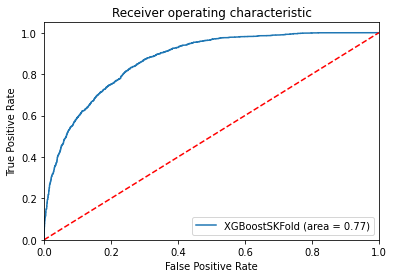

In [ ]:
roc_plot(clf, X, y, skf)

Enter your model name: XGBoostKFold


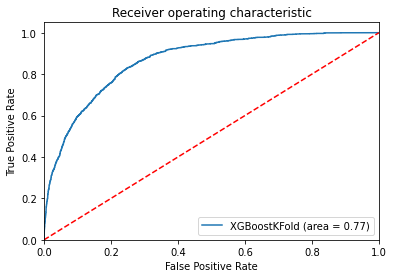

In [ ]:
roc_plot(clf, X, y, kf)

##### MLP

In [39]:
mlp = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 30, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

###### STRATIFIEDKFOLD ON MLP

In [ ]:
model_classifier(mlp, X, y, skf)

Accuracy scores of the model: 0.73

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      3489
           1       0.74      0.70      0.72      3490

    accuracy                           0.73      6979
   macro avg       0.73      0.73      0.73      6979
weighted avg       0.73      0.73      0.73      6979


 Confusion Matrix of the model
--------------------------------------
[[2650  839]
 [1039 2451]]


###### KFOLD ON MLP

In [33]:
model_classifier(mlp, X, y, kf)

Accuracy scores of the model: 0.72

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      3442
           1       0.77      0.64      0.70      3537

    accuracy                           0.72      6979
   macro avg       0.73      0.72      0.72      6979
weighted avg       0.73      0.72      0.72      6979


 Confusion Matrix of the model
--------------------------------------
[[2743  699]
 [1260 2277]]


###### ROC PLOT

Enter your model name: MLP_SKFold


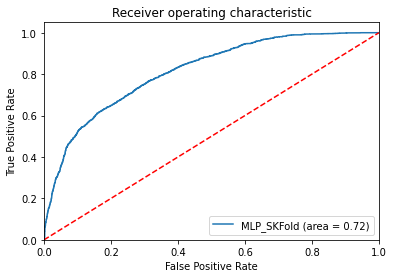

In [40]:
roc_plot(mlp, X, y, skf)

Enter your model name: MLP_KFold


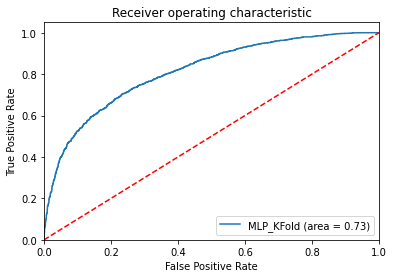

In [41]:
roc_plot(mlp, X, y, kf)